In [1]:
import pandas as pd
import kaggle
import zipfile
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2
import random


C:\Users\Zooby\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
file_names = os.listdir('C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\train')
print(file_names)

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg'

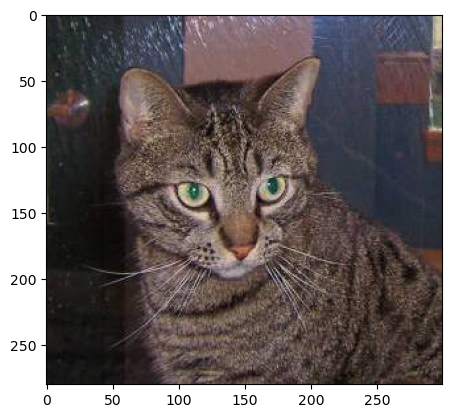

In [3]:
#display image
img = mpimg.imread('C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\train\\cat.1.jpg')
imgplt = plt.imshow(img)
plt.show()

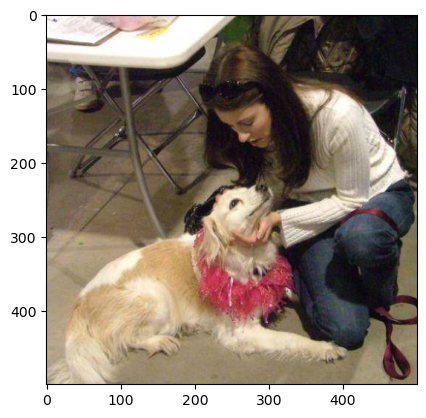

In [4]:
#displaying a dog image
img = mpimg.imread('C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\train\\dog.1942.jpg')
imgplt = plt.imshow(img)
plt.show()

###### Getting count of dogs vs cats and exporting 1000 pics of dogs and 1000 pics of cats to a seperate folder

In [5]:
import shutil

directory = 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\train'  
output_folder = 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\1000_pictures'   

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Get list of all files in the directory
file_names = os.listdir(directory)

# Initialize counters and lists
dog_count = 0
cat_count = 0

# Iterate over files and separate dogs and cats, limiting to 1000 each
for img_file in file_names:
    if img_file.startswith('dog') and dog_count < 1000:
        shutil.copy(os.path.join(directory, img_file), os.path.join(output_folder, img_file))
        dog_count += 1
    elif img_file.startswith('cat') and cat_count < 1000:
        shutil.copy(os.path.join(directory, img_file), os.path.join(output_folder, img_file))
        cat_count += 1
    
    # Break loop if we've reached 1000 dogs and 1000 cats
    if dog_count == 1000 and cat_count == 1000:
        break

print("Number of dog images:", dog_count)
print("Number of cat images:", cat_count)


Number of dog images: 1000
Number of cat images: 1000


In [12]:
all_files

['C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\train\\dog.3642.jpg',
 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\train\\dog.3820.jpg',
 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\train\\dog.1926.jpg',
 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\train\\dog.10260.jpg',
 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\train\\dog.11196.jpg',
 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\train\\dog.6206.jpg',
 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\train\\dog.8172.jpg',
 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\train\\dog.80.jpg',
 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\train\\dog.11660.jpg',
 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\train\\dog.4878.jpg',
 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\train\\dog.7010.jpg',
 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\train\\dog.4719.jpg',
 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog

###### Resizing images

In [6]:
os.mkdir('C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\image_resized')

In [7]:
original_folder = 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\1000_pictures\\'
resized_folder = 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\image_resized\\'

for filename in os.listdir(original_folder):
    img_path = original_folder+filename
    
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')
    
    newImgPath = resized_folder+filename
    img.save(newImgPath)

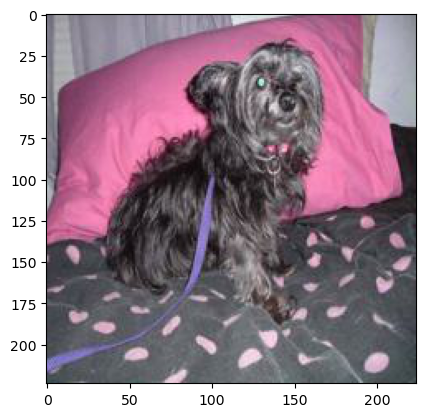

In [10]:
#display resized image
img = mpimg.imread('C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\image_resized\\dog.0.jpg')
imgplt = plt.imshow(img)
plt.show()

###### Extracting labels using file name

In [11]:

directory = 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\image_resized'
filenames = os.listdir(directory)
labels = []

for file_name in filenames:
    label = file_name.split('.')[0]  # Extract label from filename
    if label == 'dog':
        labels.append(1)
    else:
        labels.append(0)

# Check the labels
print(labels)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [12]:
print(filenames[0:5])
print(len(filenames))

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']
2000


In [13]:
values, counts = np.unique(labels, return_counts = True)
print(values)
print(counts)

[0 1]
[1000 1000]


###### Reshaping as array

In [14]:
import cv2
import glob
directory = 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\image_resized\\'

image_extension = ['png', 'jpg']
files = []

[files.extend(glob.glob(directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [39]:
dog_cat_images

array([[[[ 87, 163, 205],
         [ 89, 165, 207],
         [ 92, 168, 210],
         ...,
         [125, 203, 246],
         [123, 200, 246],
         [123, 200, 246]],

        [[ 87, 163, 205],
         [ 89, 165, 207],
         [ 92, 168, 210],
         ...,
         [125, 203, 246],
         [124, 201, 247],
         [123, 200, 246]],

        [[ 87, 163, 205],
         [ 89, 165, 207],
         [ 92, 168, 210],
         ...,
         [125, 203, 246],
         [124, 201, 247],
         [124, 201, 247]],

        ...,

        [[ 57, 123, 158],
         [ 57, 123, 158],
         [ 56, 124, 159],
         ...,
         [  0,   2,   1],
         [  0,   2,   1],
         [  0,   2,   1]],

        [[ 55, 121, 156],
         [ 56, 122, 157],
         [ 55, 123, 158],
         ...,
         [  0,   2,   1],
         [  0,   2,   1],
         [  0,   2,   1]],

        [[ 54, 120, 155],
         [ 54, 120, 155],
         [ 53, 121, 156],
         ...,
         [  0,   2,   1],
        

In [40]:
dog_cat_images.shape

(2000, 224, 224, 3)

###### Seperate feature and label

In [16]:
X = dog_cat_images
Y = np.asarray(labels)

###### Test train split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .2, stratify = Y)
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


###### Scaling X_train and X_test

In [23]:
X_trained_scaled = X_train/255
X_test_scaled = X_test/255

###### Building Neural Network

In [31]:
import tensorflow as tf
import tensorflow_hub as hub

# Load the pretrained model using TensorFlow Hub
pretrained_model_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"
pretrained_model = hub.KerasLayer(pretrained_model_url, trainable=False)

num_of_classes = 2

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),  # Assuming input shape is (224, 224, 3)
    tf.keras.layers.Lambda(lambda x: pretrained_model(x)),  # Wrap the pretrained model using Lambda layer
    tf.keras.layers.Dense(num_of_classes)  # Output layer
])

# Print model summary
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ (None, 1001)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │         2,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,004 (7.83 KB)

 Trainable params: 2,004 (7.83 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [34]:
model.fit(X_trained_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 341ms/step - acc: 0.9165 - loss: 0.2350
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 339ms/step - acc: 0.9714 - loss: 0.0670
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 343ms/step - acc: 0.9899 - loss: 0.0491
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 343ms/step - acc: 0.9923 - loss: 0.0311
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 342ms/step - acc: 0.9958 - loss: 0.0220


In [35]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 318ms/step - acc: 0.9713 - loss: 0.0847
Test Loss = 0.07595979422330856
Test Accuracy = 0.9775000214576721


###### Building a predictive system

Path of the image to be predicted: C:\\Users\\Zooby\\Desktop\\cat_test.jpg


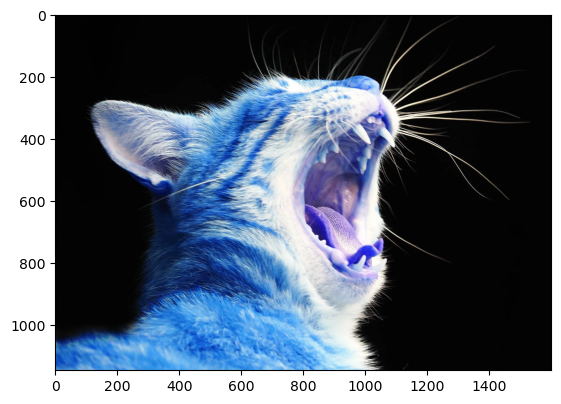

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
[[ 8.280014 -8.735768]]
0
The image represents a Cat


In [51]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)
plt.show()

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')